## Projeto de Análise de Dados e Automação

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
from cycler import cycler
from datetime import datetime, timedelta

yf.pdr_override()

### Analisando o Índice IBOVESPA

- O índice IBOVESPA é o mais importante indicador do desempenho médio das cotações negociadas na bolsa de valores B3.<br>
- Ele é formado pelos ativos (ações) com maior volume negociado nos últimos meses.

### Período

In [2]:
dias = int(input('Digite o período em número de dias '))

Digite o período em número de dias 360


In [3]:
data_inicial = datetime.now() - timedelta(days=dias)
data_final = datetime.now()

### Pegando os Dados dos Ativos

In [4]:
# requisiçao
df_ibov = pdr.get_data_yahoo('^BVSP', data_inicial, data_final)['Adj Close']
df_ibov

[*********************100%%**********************]  1 of 1 completed


Date
2022-11-03    116896.0
2022-11-04    118155.0
2022-11-07    115342.0
2022-11-08    116160.0
2022-11-09    113580.0
                ...   
2023-10-23    112785.0
2023-10-24    113762.0
2023-10-25    112830.0
2023-10-26    114777.0
2023-10-27    113301.0
Name: Adj Close, Length: 247, dtype: float64

### Calculando o Retorno

In [5]:
# localizando o último e o primeiro preço
retorno = df_ibov.iloc[-1] / df_ibov.iloc[0] - 1
print('O retorno foi de: {:.2%}'.format(retorno))

O retorno foi de: -3.08%


### Média Móvel

- **Média Móvel** é um dos indicadores que são observados pelos analistas e investidores que atuam no mercado financeiro, serve para verificar tendências dentro de uma análise gráfica.

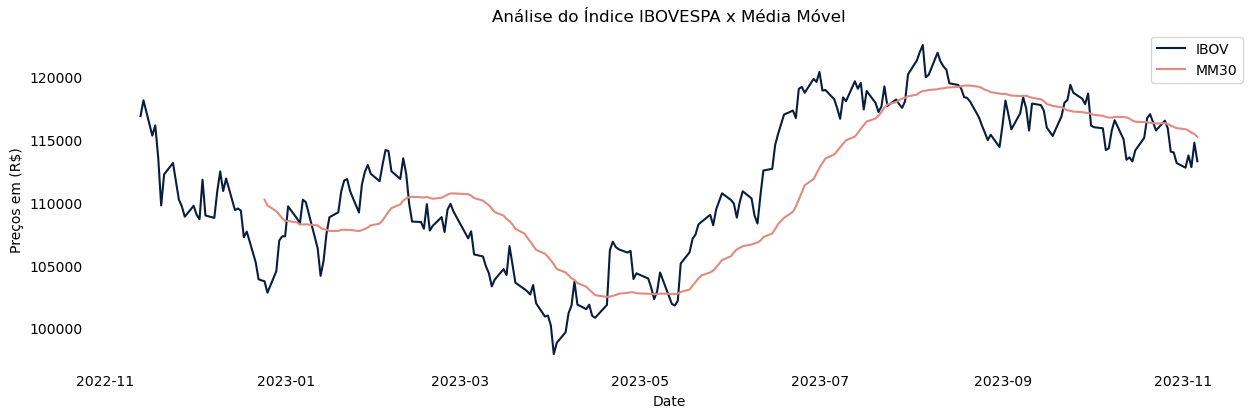

In [13]:
# Gráfico
df_ibov.plot(label='IBOV', figsize=(15, 5), color='#091D40')

# Verificando a janela do tempo
media_movel = df_ibov.rolling(30).mean()

# Gráfico
media_movel.plot(label='MM30', color='#E28A7F')

# Exibindo a legenda
plt.legend()

# Exibindo o gráfico
plt.box(False)
plt.xticks(rotation=0)
plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.title('Análise do Índice IBOVESPA x Média Móvel')
plt.ylabel('Preços em (R$)')
plt.show()

### Importando a Carteira de Ativos

In [ ]:
df_carteira = pd.read_excel(f'C:\Users\maure\OneDrive\Documentos\GitHub\automacaoFinancas\dados\carteira.xlsx', encoding='latin1')
df_carteira

In [ ]:
data_inical = datetime.now() - timedelta(days=120)
data_final = datetime.now()

# transformando a coluna Ticker em uma lista python
lista_ativos = list(df_carteira['Ticker'].astype(str) + 'SA')

# requisição
df_cotacoes = pdr.get_data_yahoo(lista_ativos, data_inical, data_final)['Adj Close']
df_cotacoes = round(df_cotacoes, 2)
df_cotacoes

### Tratamento de Dados

In [ ]:
# trazendo informações do dataframe
df_cotacoes.info()

- Os dados dentro do dataframe que aparecerem em branco serão tratados e preenchidos com os dados do dia anterior, porque para o caso especifico de preços de ações não seria coerente aplicar estatísticas como (moda ou média) dos valores analisados no perídodo.

In [ ]:
# preencehdo valores vázios
df_cotacoes = df_cotacoes.ffill()

In [ ]:
df_cotacoes.info()

### Normalizando os Dados

- Colocando os dados para incializarem a partir do mesmo valor (1) e estarão todos na mesma base, e se verificará que determinados ativos ou terão subido ou terão caido.<br>
- Pegando o último valor de uma coluna e dividindo pelo primeiro valor da mesma coluna, os outros valores do range da coluna será a comparação entre eles e o valor inicial.

df_cotacoesNorm = df_cotacoes / df_cotacoes.iloc[0]

### Plotando Gráfico

In [ ]:
df_cotacoesNorm.plot(figsize=(15, 5))
plt.legend(loc='upper left')
plt.show()

### Calculando o Retorno da Carteira

**observação:** Para calcular o retorno da carteira não pode ser todo consolidado, porque precisamo calcular o retorno de cada ativo devido as cotações dos preços serem distintas.<br>
- Pega o valor de cotação de cada ativo e multiplica pela quantidade de cotas de cada um dos ativos.

### Criando um Novo Dataframe de Valores Investidos

In [ ]:
# criando um dataframe vázio
df_valorInvestido = pd.Dataframe()

# percorrendo cada ativo do dataframe
for ativo in df_carteira['Ticker']:
    cotas = df_carteira.loc[df_carteira['Ticker'] == ativo, 'Cotas'].values[0]
    # criando uma nova coluna com os valores de cada ativo
    df_valorInvestido[ativo] = cotas * df_cotacoes[f'{ativo}.SA']
    
# criando uma nova coluna com o valor total
df_valorInvestido['Total'] = df_valorInvestido.sum(axis=1)   # somando todos os valores das colunas

df_valorInvestido = round(df_valorInvestido, 2)
df_valorInvestido

### Comparando o Retorno da Carteira com o Índice do IBOVESPA

#### Normalizando os dados da Carteira e os dados do IBOVESPA

- Colocando os dados para incializarem a partir do mesmo valor (1) e estarão todos na mesma base, e se verificará que determinados ativos ou terão subido ou terão caido.<br>
- Pegando o último valor de uma coluna e dividindo pelo primeiro valor da mesma coluna, os outros valores do range da coluna será a comparação entre eles e o valor inicial.

In [ ]:
# criando as duas tabelas normalizadas
df_ibovNorm = df_ibov / df_ibov.iloc[0]

# carteira normalizado
df_valorInvestidonorm = df_valorInvestidonorm / df_valorInvestidonorm.iloc[0]

In [ ]:
df_ibovNorm.head()

### Plotando um Gráfico do Histórico

In [ ]:
df_valorInvestidonorm['Total'].plot(figsize=(15, 5), label='Carteira')
df_ibovNorm.plot(label='IBOV')

plt.legend()

plt.show()

### Calculando o Retorno e a Correlação

In [ ]:
# retorno IBOVESPA
retorno_ibov = df_ibovNorm[-1] -1 # o cálculo aqui foi feito direto porque a dataframe já está normalizado

# retorno da Carteira
retorno_carteira - df_valorInvestidonorm['Total'][-1] -1 

# imprimindo o retorno
print(f'O retorno do IBOV foi de: {retorno_ibov:.2%}')
print(f'O retorno da Carteira de Investimentos foi de: {retorno_carteira:.2%}')

In [ ]:
# correlação
correlacao = df_valorInvestido['Total'].corr(df_ibov)

print(f'A correlação da Carteira de Investimentos e o IBOV foi de: {correlacao:.2%}')

## Fim